# Clustering Assignment

In [34]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import scipy
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

plt.style.use('ggplot')


In [4]:
data = pd.read_pickle('data/articles.pkl')

In [5]:
data.columns

Index(['document_type', 'web_url', 'lead_paragraph', 'abstract', 'snippet',
       'news_desk', 'word_count', 'source', 'section_name', 'subsection_name',
       '_id', 'pub_date', 'print_page', 'headline', 'content'],
      dtype='object')

In [6]:
data.head(3)

,document_type,web_url,lead_paragraph,abstract,snippet,news_desk,word_count,source,section_name,subsection_name,_id,pub_date,print_page,headline,content
0,article,http://www.nytimes.com/2013/10/03/sports/footb...,You would think that in a symmetric zero-sum s...,None,You would think that in a symmetric zero-sum s...,Sports,347,The New York Times,Sports,Pro Football,524d4e3a38f0d8198974001f,2013-10-03T00:00:00Z,None,Week 5 Probabilities: Why Offense Is More Impo...,the original goal building model football fore...
1,article,http://www.nytimes.com/2013/10/03/us/new-immig...,House Democrats on Wednesday unveiled an immig...,House Democrats unveil immigration bill that p...,House Democrats on Wednesday unveiled an immig...,National,83,The New York Times,U.S.,None,524cf71338f0d8198973ff7b,2013-10-03T00:00:00Z,21,New Immigration Bill Put Forward,house unveiled immigration bill provides path ...
2,article,http://www.nytimes.com/2013/10/03/us/arizona-j...,A federal judge on Wednesday ordered the appoi...,Federal Judge Murray Snow orders the appointme...,A federal judge on Wednesday ordered the appoi...,National,160,The New York Times,U.S.,None,524cf50e38f0d8198973ff79,2013-10-03T00:00:00Z,21,Arizona: Judge Orders Monitor to Oversee Maric...,federal judge wednesday ordered appointment in...


In [7]:
docs = data['content']
k = len(data['section_name'].unique())

vect = TfidfVectorizer(stop_words = 'english' ,max_features = 20000)
doc_vect = vect.fit_transform(docs)
doc_features = np.array(vect.get_feature_names())
doc_vect = doc_vect.toarray()

In [8]:
KM = KMeans(len(data['section_name'].unique())).fit(doc_vect)

In [9]:
KM_center = KM.cluster_centers_

KM_center

array([[ 4.06575815e-20,  1.27668423e-03,  6.77626358e-20, ...,
         6.77626358e-20, -2.71050543e-20,  5.42101086e-20],
       [-1.19262239e-18,  1.16634257e-02,  7.58941521e-19, ...,
        -2.03287907e-19,  1.02999206e-18, -3.63207728e-18],
       [ 4.06575815e-20,  1.16393118e-02,  1.35574178e-03, ...,
         8.13151629e-20,  2.71050543e-20, -1.08420217e-19],
       ...,
       [ 6.52369964e-04,  4.45136767e-03,  4.21599305e-04, ...,
         4.20128342e-19, -2.71050543e-19,  2.41511495e-03],
       [ 2.71050543e-20,  9.01834397e-03,  5.42101086e-20, ...,
        -6.77626358e-20,  7.69551529e-04,  5.42101086e-19],
       [ 4.06575815e-20,  6.92115023e-03,  8.13151629e-20, ...,
         9.84171764e-04, -5.42101086e-20,  1.62630326e-19]])

In [10]:
for X in KM_center:
    
    words = doc_features[X.argsort()[-10:]]
    print(words)
    

['president' 'netanyahu' 'united' 'israel' 'obama' 'mr' 'nuclear'
 'iranian' 'rouhani' 'iran']
['china' 'government' 'percent' 'new' 'court' 'year' 'company' 'state'
 'mr' 'said']
['said' 'cano' 'inning' 'jeter' 'girardi' 'season' 'game' 'pettitte'
 'rivera' 'yankee']
['museum' 'people' 'ms' 'said' 'new' 'like' 'work' 'music' 'art' 'mr']
['rebel' 'united' 'killed' 'weapon' 'government' 'syrian' 'chemical'
 'attack' 'said' 'syria']
['said' 'militant' 'attack' 'somali' 'nairobi' 'somalia' 'kenyan' 'kenya'
 'shabab' 'mall']
['fox' 'network' 'series' 'new' 'abc' 'cbs' 'viewer' 'nbc' 'mr' 'ms']
['touchdown' 'coach' 'cup' 'league' 'player' 'yard' 'said' 'season' 'team'
 'game']
['law' 'mr' 'obama' 'senate' 'care' 'health' 'shutdown' 'government'
 'house' 'republican']
['german' 'dawn' 'europe' 'government' 'germany' 'mr' 'european' 'euro'
 'merkel' 'party']


In [11]:
np.unique(data['section_name'])

array(['Arts', 'Books', 'Business Day', 'Magazine', 'Opinion',
       'Real Estate', 'Sports', 'Travel', 'U.S.', 'World'], dtype=object)

5. An alternative to finding out what each cluster represents is to look at the articles that are assigned to it. Print out the titles of a random sample of the articles assigned to each cluster to get a sense of the topic.

In [12]:
KM_res = KM.predict(doc_vect)

In [13]:
KM_res[0:3]

array([7, 8, 1], dtype=int32)

6. What 'topics' has kmeans discovered? Can you try to assign a name to each? Do the topics change as you change k (just try this for a few different values of k)?

In [14]:
for i in range(3):
    
    print(data['content'][i],' \n')

the original goal building model football forecasting weigh importance facet game in particular wanted know offense important defense defense really win championship “what’s important tricky question you would think symmetric zero-sum sport like football offense defense equally important winning for every yard point gained offensive squad defensive squad surrendered equal yard point and that’s true game level when aggregate squad performance team find total number yard point gained surrendered indeed symmetric distribution offense wider in word really good really bad offense average defense we use advanced metric team performance like expected point added epa win probability added wpa measure spread performance the standard deviation distribution tell u wide statistic distributed is bell curve wide narrow since 2000 season standard deviation epa 81 point team offense 65 point team defense for wpa it’s 2.6 win team offense 2.0 win team defense both measure 30 percent bigger offense defe

I would say that first one was opinion, then US and finally US. Against what I think the K Means model fitted as sports, arts and business day.

### Changing K value

K = 5

In [15]:
KM = KMeans(5).fit(doc_vect)
KM_center = KM.cluster_centers_
KM_res = KM.predict(doc_vect)
KM_res[0:3]

array([4, 2, 1], dtype=int32)

These result seems similar as the first one

In [16]:
KM = KMeans(3).fit(doc_vect)
KM_center = KM.cluster_centers_
KM_res = KM.predict(doc_vect)
KM_res[0:3]

array([2, 1, 0], dtype=int32)

This result seems to be like sports and US

In [17]:
KM = KMeans(2).fit(doc_vect)
KM_center = KM.cluster_centers_
KM_res = KM.predict(doc_vect)
KM_res[0:3]

array([1, 0, 0], dtype=int32)

Similar to the above result

7. If you set k == to the number of NYT sections in the dataset, does it return topics that map to a section? Why or why not?

Already done that on the first step, but results weren't that good. This might be because there are topics that might be related between them, like sports and magazine, it'll depend on the type of magazine.

In [18]:
data_subset = data[data['section_name'].isin(['Sports', 'World', 'Businees Day'])]

In [19]:
docs = data_subset['content']

doc_vect = vect.fit_transform(docs)
doc_features = np.array(vect.get_feature_names())
doc_vect = doc_vect.toarray()

In [20]:
KM = KMeans(5).fit(doc_vect)
KM_center = KM.cluster_centers_
KM_res = KM.predict(doc_vect)
KM_res[0:3]

array([3, 0, 0], dtype=int32)

In [21]:
for n, content in enumerate(docs):
    
    print(content,' \n')
    
    if n > 3:
        break

the original goal building model football forecasting weigh importance facet game in particular wanted know offense important defense defense really win championship “what’s important tricky question you would think symmetric zero-sum sport like football offense defense equally important winning for every yard point gained offensive squad defensive squad surrendered equal yard point and that’s true game level when aggregate squad performance team find total number yard point gained surrendered indeed symmetric distribution offense wider in word really good really bad offense average defense we use advanced metric team performance like expected point added epa win probability added wpa measure spread performance the standard deviation distribution tell u wide statistic distributed is bell curve wide narrow since 2000 season standard deviation epa 81 point team offense 65 point team defense for wpa it’s 2.6 win team offense 2.0 win team defense both measure 30 percent bigger offense defe

# Hierarchical Clustering

In [22]:
data_hierch = pd.DataFrame()

for topic in data['section_name'].unique():
    
    temp = data[data['section_name'] == topic]
    
    temp_idx = np.array(temp.index)
    
    rand_idx = np.random.choice(temp_idx, size = int(200/len(data['section_name'].unique())))

    data_hierch = data_hierch.append(data.iloc[rand_idx])

In [23]:
docs = data_hierch['content']

doc_vect = vect.fit_transform(docs)
doc_features = np.array(vect.get_feature_names())
doc_vect = doc_vect.toarray()

In [24]:
sp_dist = scipy.spatial.distance.pdist(doc_vect)

sp_dist.shape

(19900,)

In [25]:
sp_dist = scipy.spatial.distance.squareform(sp_dist)

sp_dist.shape

(200, 200)

In [30]:
hierch_link = hierarchy.linkage(sp_dist)

/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


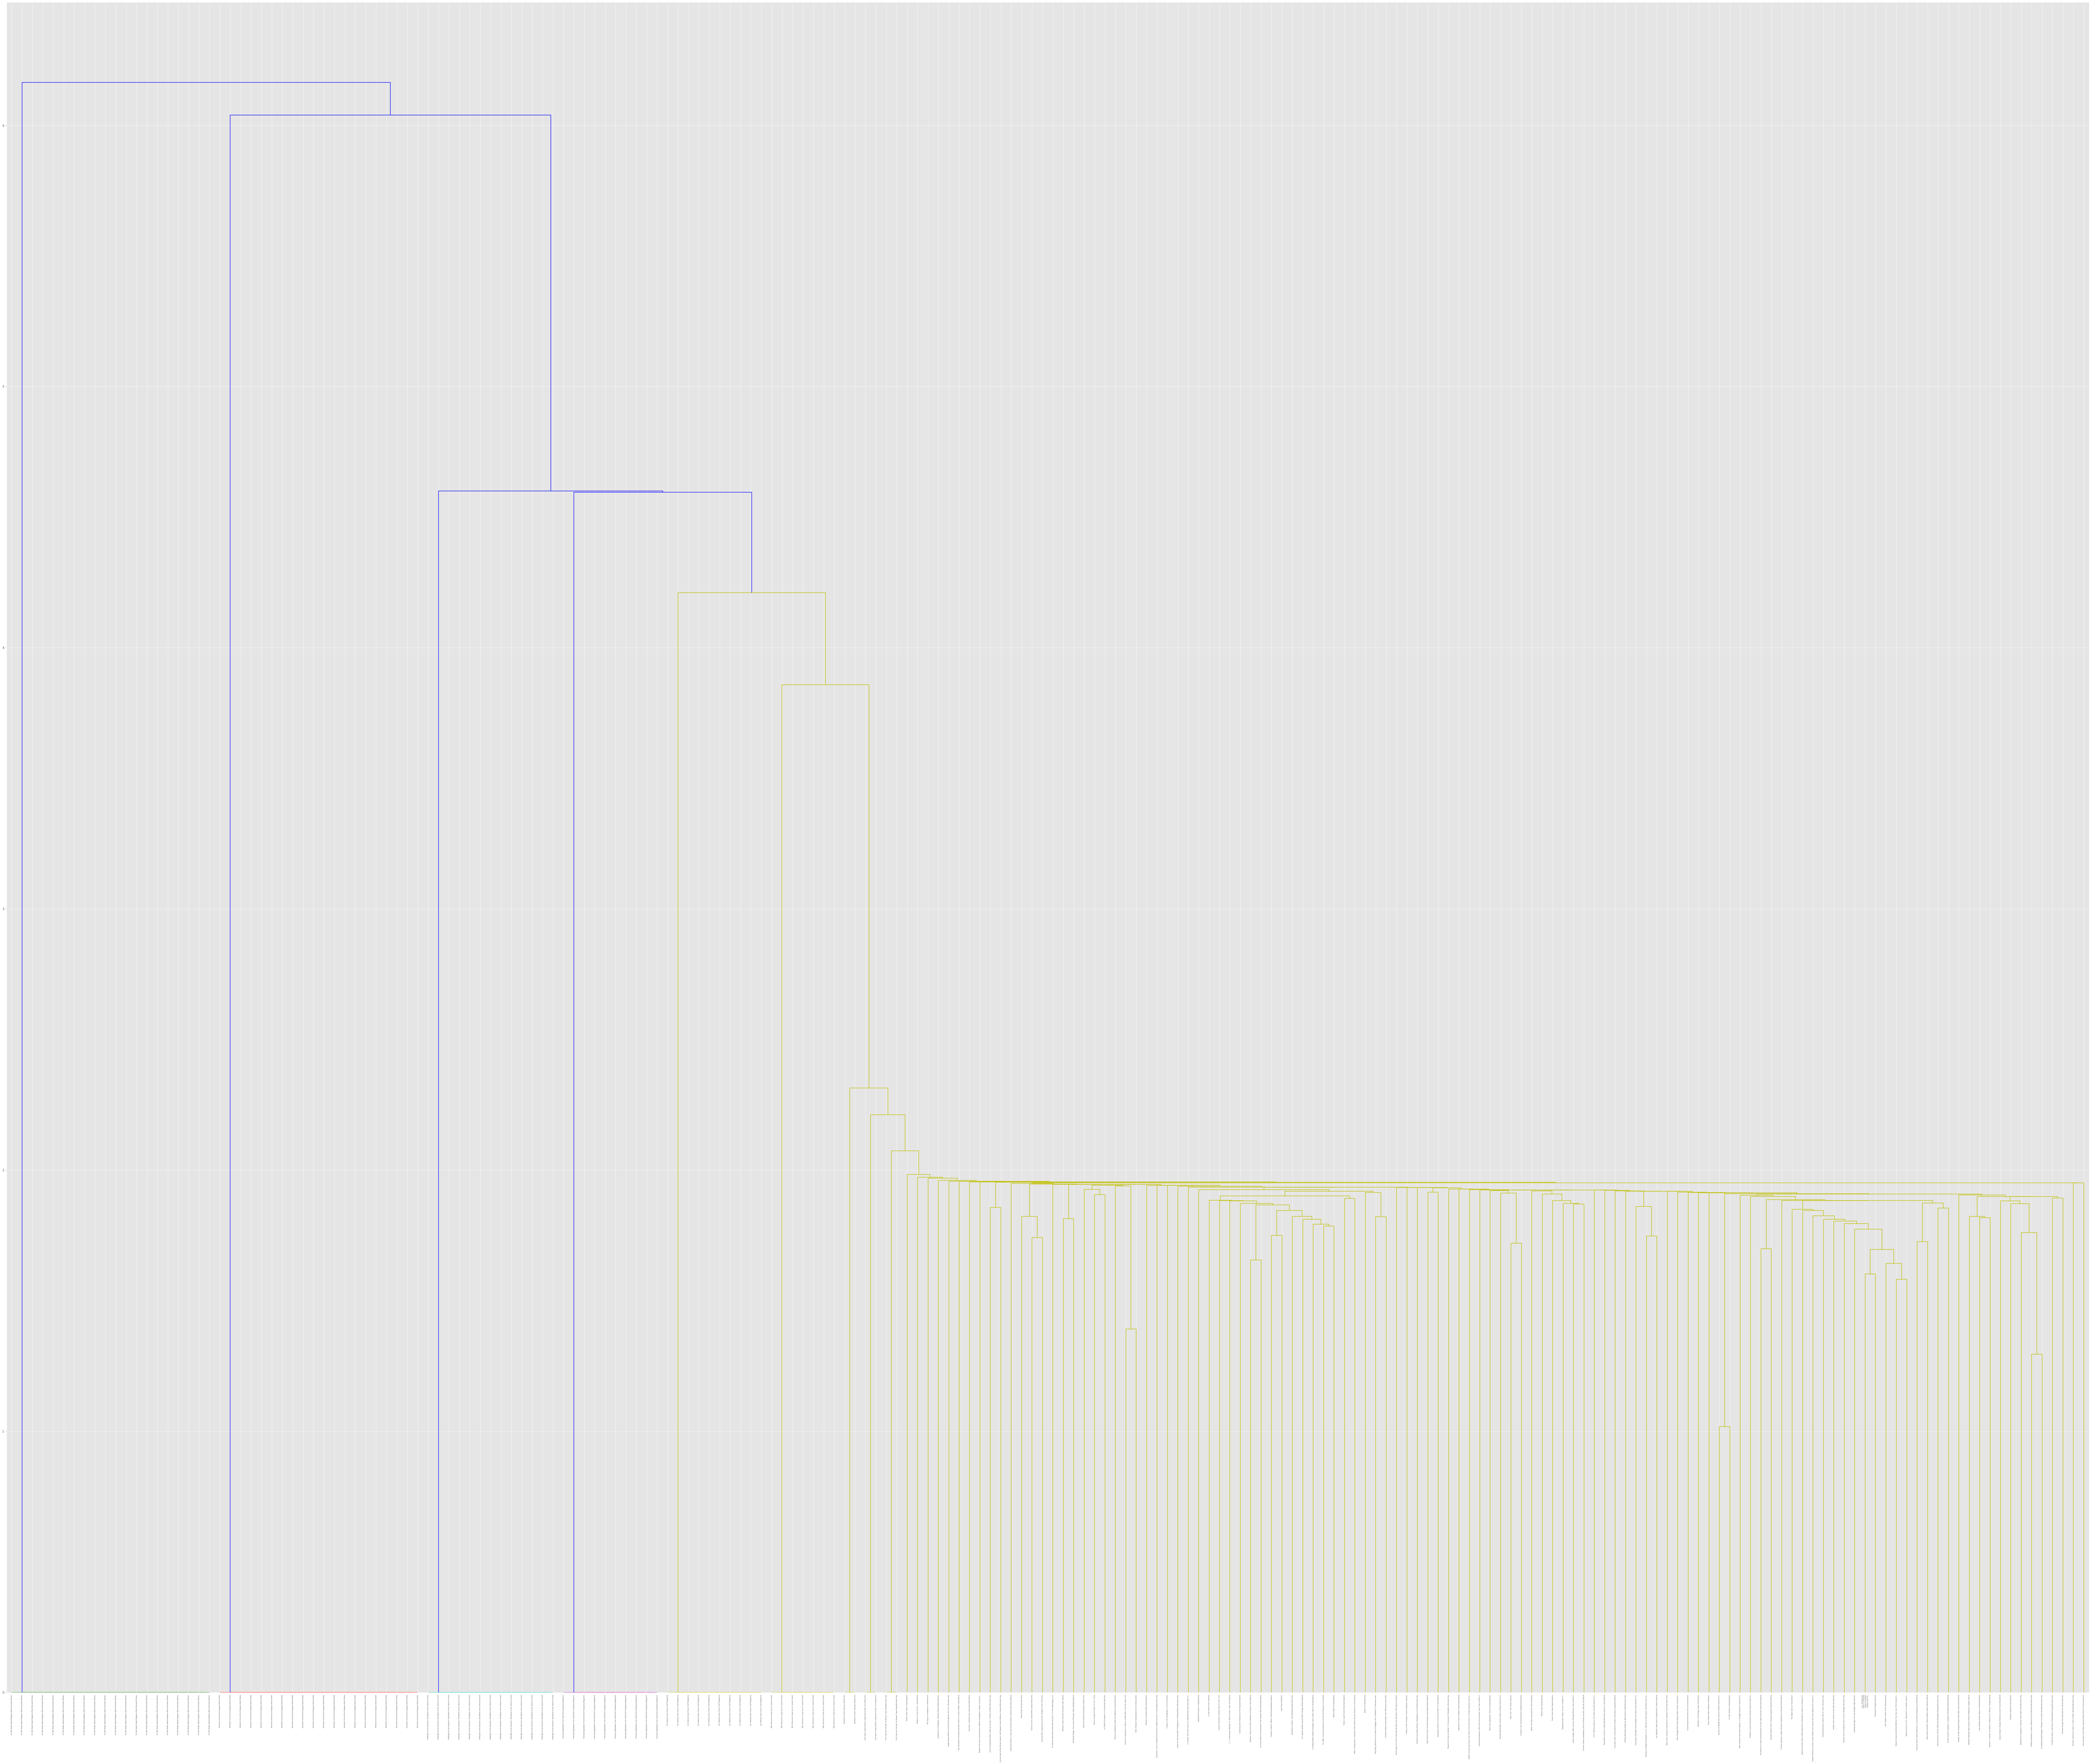

In [52]:
fig, ax = plt.subplots(1,1, figsize=(120,100))

dend = hierarchy.dendrogram(hierch_link, labels=np.array(data_hierch['headline']+';'+data_hierch['section_name']));
plt.savefig('dendrogram_1')